In [47]:
import sqlite3
import pandas as pd
import numpy as np
from urllib.parse import urlparse

In [48]:
con = sqlite3.connect('/home/john/.config/google-chrome/Default/History')
res = pd.read_sql_query("select last_visit_time,datetime(last_visit_time / 1000000 + (strftime('%s', '1601-01-01')), 'unixepoch') as datetime,url from urls order by last_visit_time desc;",con)
res = res.drop(res[res.last_visit_time == 0].index)
res.datetime = pd.to_datetime(res.datetime)

In [49]:
parser = lambda x: urlparse(x).netloc
res.url = res.url.apply(parser)

In [55]:
freq = res.url.value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns  = ['domain','count']


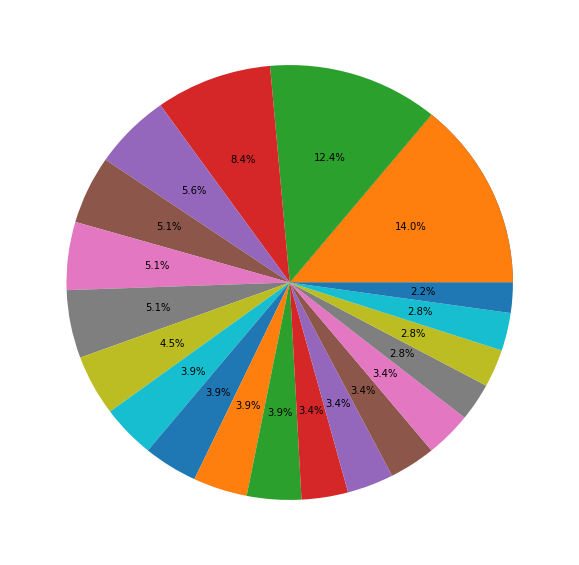

In [61]:
import matplotlib.pyplot as plt
plt.figure(1,figsize=(10,10))
data=freq['count'].head(20).tolist()
plt.pie(data,autopct='%1.1f%%',labels=None)
plt.show()